# Importaciones

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Carga de Datos

In [9]:
rl = pd.read_json("aprendizaje_refuerzo.json",lines = True)
rl

,Acciones,Siguiente Estados,Estados,Recompensa
0,1,1,"[0.0151607515, 1.4318802357, 0.762010276300000...",0.345692
1,3,2,"[0.0228032116, 1.4414606094, 0.7737362981, 0.4...",-1.604062
2,1,3,"[0.0303514488, 1.4504432677999999, 0.761899411...",0.657523
3,1,4,"[0.0378080383, 1.4588290453, 0.7503976226, 0.3...",0.873806
4,3,5,"[0.0453316681, 1.4666104317, 0.758811116200000...",-1.069631
...,...,...,...,...
45600,0,112,"[0.0700754151, 0.09790128470000001, -0.0571497...",-0.264992
45601,0,113,"[0.06954813, 0.0639473051, -0.0571488142, -1.5...",-0.537628
45602,1,114,"[0.0689314827, 0.029331289200000003, -0.068508...",8.153831
45603,3,115,"[0.068693921, -0.0042107012, -0.0100885388, -1...",7.001870


Dado que la columna 'Estados' corresponde a una lista de valores, se divide de tal manera que cada una sea una columna única que permita el entrenamiento del modelo

In [10]:
estados_expandidos = pd.DataFrame(rl['Estados'].tolist())
estados_expandidos.columns = [f'estado_{i}' for i in range(estados_expandidos.shape[1])]
rl = rl.drop(columns='Estados').join(estados_expandidos)
rl

,Acciones,Siguiente Estados,Recompensa,estado_0,estado_1,estado_2,estado_3,estado_4,estado_5,estado_6,estado_7
0,1,1,0.345692,0.015161,1.431880,0.762010,0.452856,-0.015852,-0.140784,0.0,0.0
1,3,2,-1.604062,0.022803,1.441461,0.773736,0.425661,-0.025237,-0.187717,0.0,0.0
2,1,3,0.657523,0.030351,1.450443,0.761899,0.399093,-0.032240,-0.140065,0.0,0.0
3,1,4,0.873806,0.037808,1.458829,0.750398,0.372594,-0.036932,-0.093848,0.0,0.0
4,3,5,-1.069631,0.045332,1.466610,0.758811,0.345666,-0.043310,-0.127584,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
45600,0,112,-0.264992,0.070075,0.097901,-0.057150,-1.483483,0.352335,0.092901,0.0,0.0
45601,0,113,-0.537628,0.069548,0.063947,-0.057149,-1.510151,0.356980,0.092900,0.0,0.0
45602,1,114,8.153831,0.068931,0.029331,-0.068508,-1.540212,0.364205,0.144499,0.0,1.0
45603,3,115,7.001870,0.068694,-0.004211,-0.010089,-1.487406,0.354270,-0.193075,0.0,1.0


# Entrenamiento de la Red Neuronal

En este caso, se quiere predecir la recompensa a partir del resto de columnas. Se realiza la partición de train - test

In [11]:
X = rl.drop(columns='Recompensa')
y = rl['Recompensa']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)

Dado que las variables predictoras tienen escalas similares, se decide no estandarizar; sin embargo, en caso de que más adelante se considere necesario aplicar este procedimiento para mayor estabilidad del modelo, se realizará.

Se define la arquitectura de la Red Neuronal

In [16]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation = "relu", input_shape = (X_train.shape[1],), name = "Input"),
    tf.keras.layers.Dense(10, activation="relu", name = "Oculta_1"),
    tf.keras.layers.Dense(1, name = "Output")
])

modelo.compile(
    optimizer='adam',
    loss='mse',  
    metrics=['mse','mae']  
)

c:\Users\samue\miniconda3\envs\Redes_Neuronales\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Dense)                   │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Oculta_1 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 441 (1.72 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

Se entrena la red neuronal

In [18]:
historial = modelo.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 142.5206 - mae: 4.0714 - mse: 142.5206 - val_loss: 115.4436 - val_mae: 3.2028 - val_mse: 115.4436
Epoch 2/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 115.5420 - mae: 3.2932 - mse: 115.5420 - val_loss: 99.6139 - val_mae: 3.1062 - val_mse: 99.6139
Epoch 3/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 92.9608 - mae: 3.1057 - mse: 92.9608 - val_loss: 88.6219 - val_mae: 2.7705 - val_mse: 88.6219
Epoch 4/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 85.6607 - mae: 3.1107 - mse: 85.6607 - val_loss: 87.0183 - val_mae: 3.3112 - val_mse: 87.0183
Epoch 5/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 78.4942 - mae: 3.0164 - mse: 78.4942 - val_loss: 80.9275 - val_mae: 2.7489 - val_mse: 80.9275
Epoch 6/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 85.3569 - mae: 3.0624 - mse: 85.3569 - val_loss: 77.1557 - val_mae: 2.8397 - val_mse: 77.1557
Epoch 7/50
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - lo

In [19]:
loss, mse, mae = modelo.evaluate(X_test, y_test)
y_pred = modelo.predict(X_test)
print(f"MSE: {mse}\nMAE: {mae}\nR2: {r2_score(y_test,y_pred)}")

286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 49.3222 - mae: 2.2034 - mse: 49.3222
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE: 47.38771057128906
MAE: 2.1949925422668457
R2: 0.6162682834209657


Finalmente, se grafican los resultados

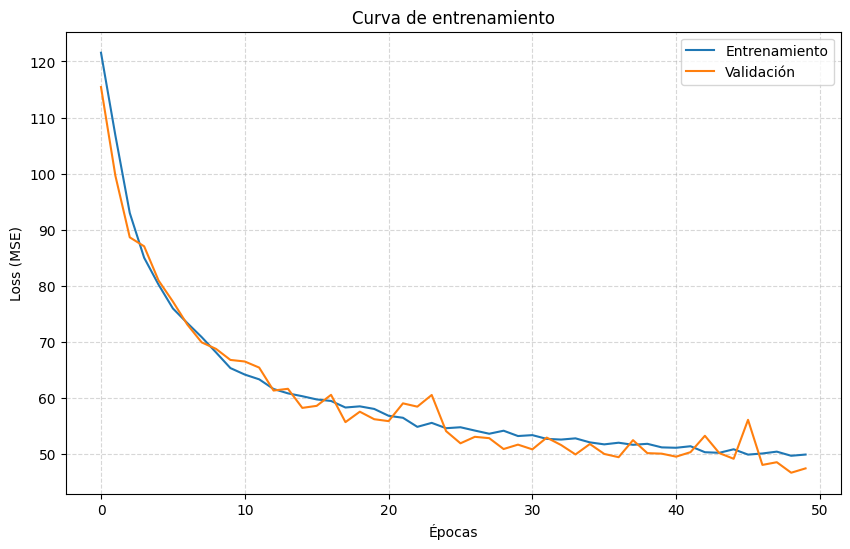

In [20]:
plt.figure(figsize=(10,6))
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Curva de entrenamiento')
plt.grid(linestyle="--",alpha = 0.5)
plt.show()

In [25]:
json_string = modelo.to_json()
with open("modelo.json", "w") as json_file:
    json_file.write(json_string)
